# Universe Selection

by Joshua Isaacson and Hannah Isaacson 

For our Fall 2017 SICE@IU undergraduate research project, *A Sentiment-Based Long-Short Equity Strategy*.

This notebook covers our process of defining the trading universe for which the algorithm operates.

### Imports 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from quantopian.pipeline.classifiers.fundamentals import Sector  
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.data import morningstar
from quantopian.research import run_pipeline
from quantopian.pipeline.data import Fundamentals  
from quantopian.pipeline.factors import CustomFactor
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.filters import Q1500US

### Universe Filters

* Market capitalization greater than 500,000,000
* Equity price greater than or equal to $5.00
* Total scanned messages in the StockTwits dataset greater than 20

In [17]:
market_cap_filter = morningstar.valuation.market_cap.latest >= 500000000
price_filter = USEquityPricing.close.latest >= 5
sentiment_filter = stocktwits.total_scanned_messages.latest > 20

In [21]:
universe = Q1500US() & market_cap_filter & price_filter & sentiment_filter

pipe = Pipeline(
        columns={
            'Market Cap' : morningstar.valuation.market_cap.latest,
            'Price' : USEquityPricing.close.latest,
            'Total Scanned Messages' : stocktwits.total_scanned_messages.latest,
            'Bear Scored Messages' : stocktwits.bear_scored_messages.latest
    
        })

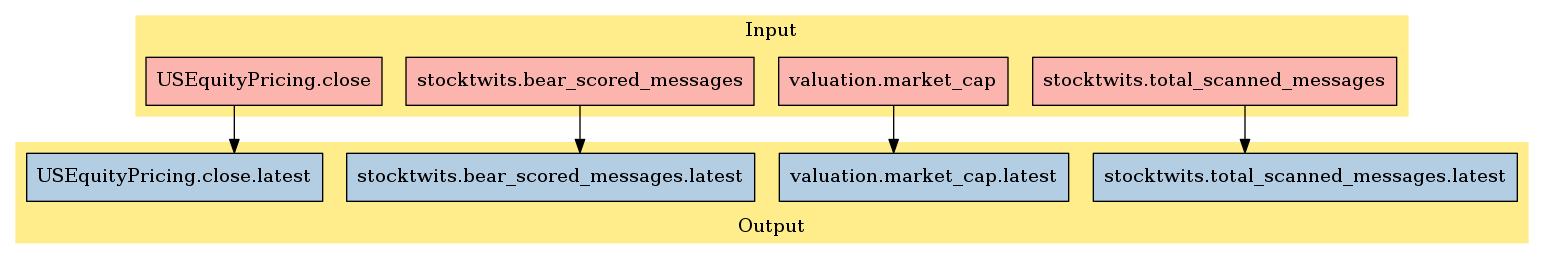

In [22]:
pipe.show_graph(format='png')